In [38]:
print("Zbiór danych: Abalone Data Set (UCI Machine Learning Repository)")
print("Źródło: https://archive.ics.uci.edu/ml/datasets/abalone")


Zbiór danych: Abalone Data Set (UCI Machine Learning Repository)
Źródło: https://archive.ics.uci.edu/ml/datasets/abalone


In [39]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
  
abalone = fetch_ucirepo(id=1) 

X = abalone.data.features 
y = abalone.data.targets

In [40]:
df = X
df['Rings'] = y

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>,
        <Axes: title={'center': 'Viscera_weight'}>],
       [<Axes: title={'center': 'Shell_weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

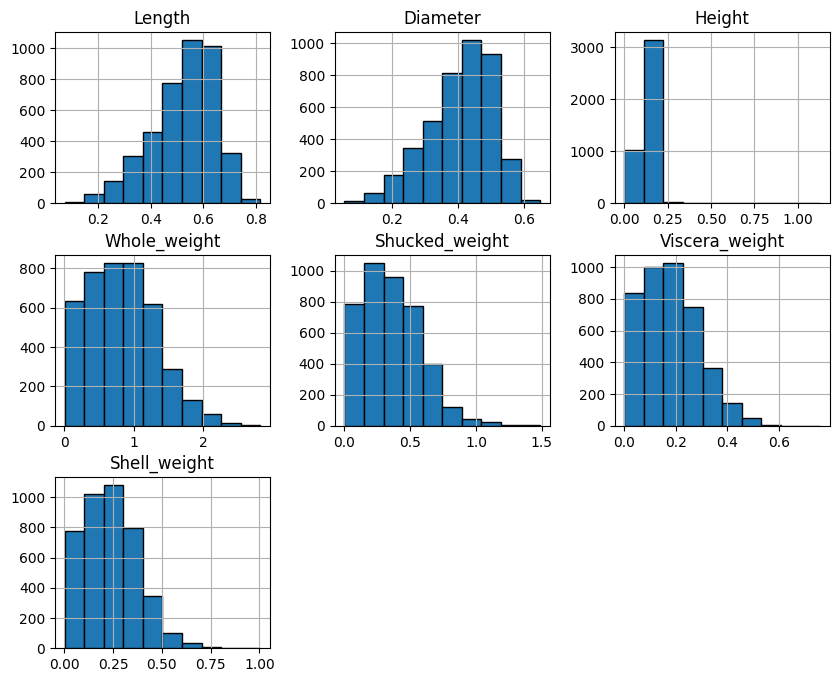

In [41]:
numeric_columns = ["Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight"]
df[numeric_columns].hist(figsize=(10, 8), bins=10, edgecolor='black')


In [42]:
import numpy as np
from scipy import stats

desc = df[numeric_columns + ['Rings']].describe().T
desc['mad'] = df[numeric_columns + ['Rings']].apply(lambda x: np.mean(np.abs(x - np.mean(x))))
desc['mode'] = df[numeric_columns + ['Rings']].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
desc['skew'] = df[numeric_columns + ['Rings']].skew()
desc['var'] = df[numeric_columns + ['Rings']].var()
desc['kurtosis'] = df[numeric_columns + ['Rings']].kurtosis()
desc['iqr'] = df[numeric_columns + ['Rings']].apply(stats.iqr)
desc['q25'] = df[numeric_columns + ['Rings']].quantile(0.25)
desc['q75'] = df[numeric_columns + ['Rings']].quantile(0.75)
print(desc[['mean','std','mad','50%','mode','var','kurtosis','skew','iqr','q25','q75']])


                    mean       std       mad     50%    mode        var  \
Length          0.523992  0.120093  0.096678  0.5450  0.5500   0.014422   
Diameter        0.407881  0.099240  0.080296  0.4250  0.4500   0.009849   
Height          0.139516  0.041827  0.031285  0.1400  0.1500   0.001750   
Whole_weight    0.828742  0.490389  0.400454  0.7995  0.2225   0.240481   
Shucked_weight  0.359367  0.221963  0.179455  0.3360  0.1750   0.049268   
Viscera_weight  0.180594  0.109614  0.089252  0.1710  0.1715   0.012015   
Shell_weight    0.238831  0.139203  0.112415  0.2340  0.2750   0.019377   
Rings           9.933684  3.224169  2.362462  9.0000  9.0000  10.395266   

                 kurtosis      skew     iqr     q25     q75  
Length           0.064621 -0.639873  0.1650  0.4500   0.615  
Diameter        -0.045476 -0.609198  0.1300  0.3500   0.480  
Height          76.025509  3.128817  0.0500  0.1150   0.165  
Whole_weight    -0.023644  0.530959  0.7115  0.4415   1.153  
Shucked_weight

In [43]:
from scipy.stats import t, chi2

alpha = 0.05
n = len(df['Rings'])
mean = df['Rings'].mean()
std = df['Rings'].std(ddof=1)
var = df['Rings'].var(ddof=1)

t_crit = t.ppf(1 - alpha/2, n-1)
ci_mean = (mean - t_crit*std/np.sqrt(n), mean + t_crit*std/np.sqrt(n))
print(f"Przedział ufności dla średniej (Rings): ({float(ci_mean[0]):.4f}, {float(ci_mean[1]):.4f})")

chi2_lower = chi2.ppf(alpha/2, n-1)
chi2_upper = chi2.ppf(1-alpha/2, n-1)
ci_var = ((n-1)*var/chi2_upper, (n-1)*var/chi2_lower)
print(f"Przedział ufności dla wariancji (Rings): ({float(ci_var[0]):.4f}, {float(ci_var[1]):.4f})")


Przedział ufności dla średniej (Rings): (9.8359, 10.0315)
Przedział ufności dla wariancji (Rings): (9.9634, 10.8560)
